In [1]:
import glob 
import shutil
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

from scipy.stats import kde


In [2]:
from PIL import Image

In [3]:
from scipy.interpolate import griddata

In [4]:
xi00 = np.load('xi_AL8k.npy') 
yi00 = np.load('yi_AL8k.npy') 
zi00 = np.load('zi_AL8k.npy') 


xi01 = np.load('xi_MI8k.npy')
yi01 = np.load('yi_MI8k.npy')
zi01 = np.load('zi_MI8k.npy')

xi02 = np.load('xi_AL3k.npy')
yi02 = np.load('yi_AL3k.npy')
zi02 = np.load('zi_AL3k.npy')

xi03 = np.load('xi_MI3k.npy')
yi03 = np.load('yi_MI3k.npy')
zi03 = np.load('zi_MI3k.npy')

xi8k = np.load('xi_pred_8k.npy')
yi8k = np.load('yi_pred_8k.npy')
zi8k = np.load('zi_pred_8k.npy')

xi3k = np.load('xi_pred_3k.npy')
yi3k = np.load('yi_pred_3k.npy')
zi3k = np.load('zi_pred_3k.npy')

xi04 = np.load('xi_AL500.npy')
yi04 = np.load('yi_AL500.npy')
zi04 = np.load('zi_AL500.npy')

xi05 = np.load('xi_MI500.npy')
yi05 = np.load('yi_MI500.npy')
zi05 = np.load('zi_MI500.npy')

xi04 = np.load('xi_pred_500.npy')
yi04 = np.load('yi_pred_500.npy')
zi04 = np.load('zi_pred_500.npy')


In [37]:
np.corrcoef(zi3k.flatten(), (zi03 + zi02).flatten())[0, 1]

-0.8936148815403627

In [38]:
np.corrcoef(zi8k.flatten(), (zi00 + zi01).flatten())[0, 1]

-0.9040831393815156

In [5]:
zmi3k = np.array([0.042944357,0.030322382,0.029028568,0.02384444,
 0.021891586,0.01101462,0.02072622,0.03660927,0.022428116,0.022591107,0.02050198,
 0.027676187,0.019684695,0.02112153,0.026962882,0.0071911346,0.021756697,0.01433774,0.028378265,0.024197018,0.013181438,
 0.015200426,0.01777846,0.02352947,0.025955457])

zmi8k = np.array([0.018917322,0.033660315,
 0.02075087,0.017478405,0.013318525,0.003627438,
 0.012714442,0.029343246,0.012764091,0.013379329,0.009680659,
 0.012507247,0.013384108,0.008035957,0.011998585,0.0023610771,0.0067320424,0.010452608,
 0.013476178,0.010491702,0.0042882105,0.0063753733,0.00801893,0.010185783,
 0.016078338])

zal3k = np.array([0.34734988,0.39818248,
 0.5059311,0.59387314,0.6912319,0.10553194,0.31525028,
 0.4604837,0.55139714,0.5761197,0.18152702,0.28397888,0.33845988,0.3406127,
 0.5361533,0.08675845,0.22617076,0.23639604,0.39704448,0.44000342,0.13781556,
 0.18846704,0.27581373,0.383641,0.55564713])

zal8k = np.array([0.22511935,0.34609243,0.47045428,0.5068839,
 0.56046885,0.057396643,0.23115946,0.3778177,
 0.46444973,0.53443414,0.11517436,0.195514,0.32596004,
 0.2729308,0.42841426,0.04741553,0.1378999,0.19310418,
 0.31102362,0.35739762,0.058570176,0.1198936,0.2140655,0.29626966,0.4367949])

In [20]:
aleadiff1 = np.abs(zi02 - zi00)
episdiff1 = np.abs(zi03 - zi01)

In [21]:
aleadiff = np.abs(zal3k - zal8k)
episdiff = np.abs(zmi3k - zmi8k)

In [22]:
episdiff

array([0.02402704, 0.00333793, 0.0082777 , 0.00636604, 0.00857306,
       0.00738718, 0.00801178, 0.00726602, 0.00966403, 0.00921178,
       0.01082132, 0.01516894, 0.00630059, 0.01308557, 0.0149643 ,
       0.00483006, 0.01502465, 0.00388513, 0.01490209, 0.01370532,
       0.00889323, 0.00882505, 0.00975953, 0.01334369, 0.00987712])

In [23]:
episdiff = episdiff.flatten()#[1:]
aleadiff = aleadiff.flatten()#[1:]
mydata = np.array([episdiff.flatten(), aleadiff.flatten()])

In [24]:
episdiff

array([0.02402704, 0.00333793, 0.0082777 , 0.00636604, 0.00857306,
       0.00738718, 0.00801178, 0.00726602, 0.00966403, 0.00921178,
       0.01082132, 0.01516894, 0.00630059, 0.01308557, 0.0149643 ,
       0.00483006, 0.01502465, 0.00388513, 0.01490209, 0.01370532,
       0.00889323, 0.00882505, 0.00975953, 0.01334369, 0.00987712])

In [25]:
np.corrcoef(mydata[0,:], mydata[1,:])[0, 1]
#pearsonr(mydata[0,:], mydata[1,:])

0.579836578085452

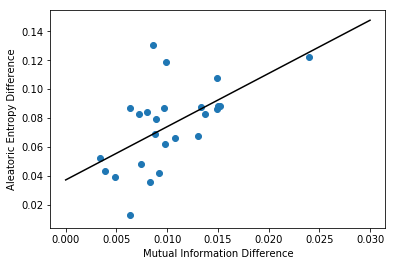

In [26]:
#from matplotlib.mlab import PCA
from sklearn.decomposition import SparsePCA

plt.plot([-0.00, 0.03], [3.68409668*-0.00 +0.03711262, 3.68409668*0.03 +0.03711262 ], 'k')
#plt.plot([0, 1], [0.03349103, 0.99943902])
#plt.quiver([-0.01],[0.05],[0.05511949993817944],[ 4.7681625*0.05 +0.05511949993817944],
#          angles='xy', scale_units='xy', scale=0.5, )
plt.xlabel('Mutual Information Difference')
plt.ylabel('Aleatoric Entropy Difference')
plt.scatter(mydata[0,:], mydata[1,:])
plt.show()

In [27]:
episdiff.min()

0.0033379330000000047

In [36]:
plt.subplots_adjust(bottom=2.5, right=None, top=3.5, wspace=None, hspace=0.2)
plt.tight_layout()
plt.figure(figsize=(18,5))
textstr = 'PEARSON CORRELATION COEFFICIENT: 0.579'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1 = plt.subplot(1,3,1)
ax1.contour(xi3k, yi3k, episdiff1, levels=np.linspace(episdiff1.min(), episdiff1.max(), num=12, endpoint=True), linewidths=1.5, colors='k')
cntr1 = ax1.contourf(xi3k, yi3k, episdiff1, levels=np.linspace(episdiff1.min(), episdiff1.max(), num=12, endpoint=True), cmap="RdYlGn_r")
#cbar = plt.colorbar(cntr1)
#cbar.set_clim(vmax=1.0)
#cbar_ticks = np.linspace(episdiff1.min(), episdiff1.max(), num=6, endpoint=True)
#cbar.set_ticks(cbar_ticks) 

ax1.set_title('(a) Mutual Information Difference')
plt.xlabel('% occlusion')
plt.ylabel('depth')


ax2 = plt.subplot(1,3,2)
ax2.contour(xi3k, yi3k, aleadiff1, levels=np.linspace(aleadiff1.min(), aleadiff1.max(), num=12, endpoint=True), linewidths=1.5, colors='k')
cntr2 = ax2.contourf(xi3k, yi3k, aleadiff1, levels=np.linspace(aleadiff1.min(), aleadiff1.max(), num=12, endpoint=True), cmap="RdYlGn_r")
#cbar = plt.colorbar(cntr2)
#cbar.set_clim(vmax=1.0)
#cbar_ticks = np.linspace(aleadiff1.min(), aleadiff1.max(), num=6, endpoint=True)
#cbar.set_ticks(cbar_ticks) 
ax2.set_title('(b) Aleatoric Entropy Difference')
plt.xlabel('% occlusion')
plt.ylabel('depth')
#plt.show()

plt.subplot(1,3,3)
plt.plot([0.0, 0.03], [3.68409668*-0.0 + 0.03711262, 3.68409668*0.03 +0.03711262 ], 'k')
#plt.plot([0, 1], [0.03349103, 0.99943902])
#plt.quiver([-0.01],[0.05],[0.05511949993817944],[ 4.7681625*0.05 +0.05511949993817944],
#          angles='xy', scale_units='xy', scale=0.5, )
plt.text(-0.0035, -0.025, textstr, fontsize=14, bbox = props)
plt.xlabel('Mutual Information Difference')
plt.ylabel('Aleatoric Entropy Difference')
plt.title('(c) Relational Plot')
plt.scatter(mydata[0,:], mydata[1,:])


cax = plt.axes([0.4, 0.01, 0.23, 0.02])
cbar = plt.colorbar(cntr2, cax, orientation="horizontal")
#cbar.set_clim(vmax=1.1)
cbar_ticks = np.linspace(aleadiff1.min(), aleadiff1.max(), num=6, endpoint=True)
cbar.set_ticks(cbar_ticks) 

cax1 = plt.axes([0.125, 0.01, 0.23, 0.02])
cbar1 = plt.colorbar(cntr1, cax1, orientation="horizontal")
#cbar.set_clim(vmax=1.1)
cbar_ticks1 = np.linspace(episdiff1.min(), episdiff1.max(), num=6, endpoint=True)
cbar1.set_ticks(cbar_ticks1) 

plt.show()



<Figure size 432x288 with 0 Axes>

In [5]:
#zi01[zi01>0.08] = 0.08
zi01[zi01 < 0] = 0

In [19]:
zi3k.shape

(40, 40)

In [20]:
zi03.max()

0.057811962643681596

/home/btphan/anaconda2/envs/tf_gpu/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 432x288 with 0 Axes>

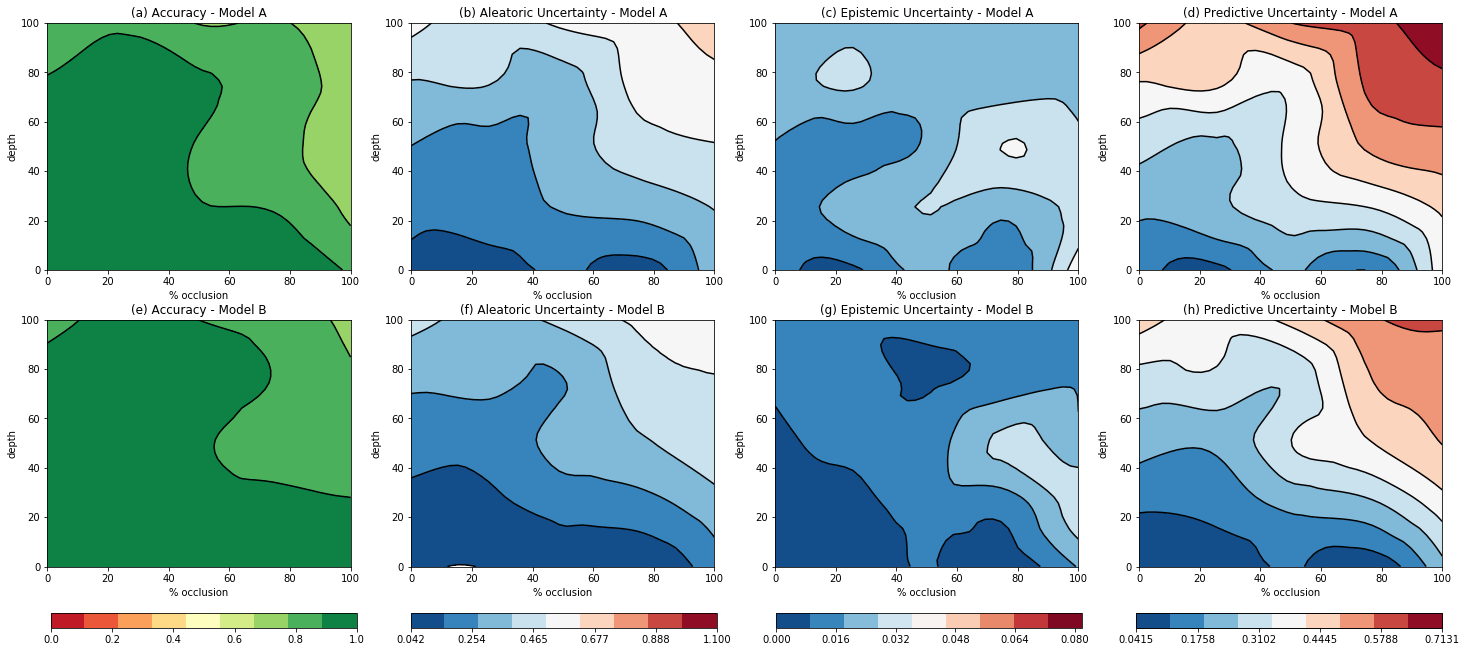

In [5]:
plt.subplots_adjust(bottom=2.5, right=None, top=3.5, wspace=None, hspace=0.2)
plt.tight_layout()
plt.figure(figsize=(25,10))


bbb = zi00 + zi01

ax1 = plt.subplot(2,4,1)
ax1.contour(xi3k, yi3k, zi3k, levels=np.linspace(0.0, 1., num=10, endpoint=True), linewidths=1.5, colors='k')
cntr1 = ax1.contourf(xi3k, yi3k, zi3k, levels=np.linspace(0.0, 1., num=10, endpoint=True), cmap="RdYlGn")
ax1.set_title('(a) Accuracy - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')


ax9 = plt.subplot(2,4,5)
ax9.contour(xi8k, yi8k, zi8k, levels=np.linspace(0.0, 1., num=10, endpoint=True), linewidths=1.5, colors='k')
cntr9 = ax9.contourf(xi8k, yi8k, zi8k, levels=np.linspace(0.0, 1., num=10, endpoint=True), cmap="RdYlGn")
ax9.set_title('(e) Accuracy - Model B')
plt.xlabel('% occlusion')
plt.ylabel('depth')


ax2 = plt.subplot(2,4,2)
ax2.contour(xi02, yi02, zi02, levels=np.linspace(0.042, 1.1, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr2 = ax2.contourf(xi02, yi02, zi02, levels=np.linspace(0.042, 1.1, num=10, endpoint=True), cmap="RdBu_r")
ax2.set_title('(b) Aleatoric Uncertainty - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')




zzz = zi02 + zi03
ax4 = plt.subplot(2,4,4)
ax4.contour(xi03, yi03, zzz, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), linewidths=1.5, colors='k')
cntr4 = ax4.contourf(xi03, yi03, zzz, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), cmap="RdBu_r")
ax4.set_title('(d) Predictive Uncertainty - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')

ax5 = plt.subplot(2,4,6)
ax5.contour(xi00, yi00, zi00, levels=np.linspace(0.042, 1.1, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr5 = ax5.contourf(xi00, yi00, zi00, levels=np.linspace(0.042, 1.1, num=10, endpoint=True), cmap="RdBu_r")
ax5.set_title('(f) Aleatoric Uncertainty - Model B')
plt.xlabel('% occlusion')
plt.ylabel('depth')

ax3 = plt.subplot(2,4,3)
ax3.contour(xi03, yi03, zi03, levels=np.linspace(0, 0.082, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr3 = ax3.contourf(xi03, yi03, zi03, levels=np.linspace(0, 0.082, num=10, endpoint=True), cmap="RdBu_r")
ax3.set_title('(c) Epistemic Uncertainty - Model A')
plt.xlabel('% occlusion')
plt.ylabel('depth')
ax6 = plt.subplot(2,4,7)
ax6.contour(xi01, yi01, zi01, levels=np.linspace(0, 0.082, num=10, endpoint=True), linewidths=1.5, colors='k')
cntr6 = ax6.contourf(xi01, yi01, zi01, levels=np.linspace(0, 0.082, num=10, endpoint=True), cmap="RdBu_r")
ax6.set_title('(g) Epistemic Uncertainty - Model B')
plt.xlabel('% occlusion')
plt.ylabel('depth')


ax7 = plt.subplot(2,4,8)
ax7.contour(xi01, yi01, bbb, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), linewidths=1.5, colors='k')
cntr7 = ax7.contourf(xi01, yi01, bbb, levels=np.linspace(bbb.min(), zzz.max(), num=10, endpoint=True), cmap="RdBu_r")
ax7.set_title('(h) Predictive Uncertainty - Mobel B')
plt.xlabel('% occlusion')
plt.ylabel('depth')

cax = plt.axes([0.327, 0.04, 0.17, 0.02])
cbar = plt.colorbar(cntr2, cax, orientation="horizontal")
cbar.set_clim(vmax=1.1)
cbar_ticks = np.linspace(0.042, 1.1, num=6, endpoint=True)
cbar.set_ticks(cbar_ticks) 


cax1 = plt.axes([0.53, 0.04, 0.17, 0.02])
cbar1 = plt.colorbar(cntr3, cax1, orientation="horizontal")
cbar1.set_clim(vmax=0.08)
cbar_ticks1 = np.linspace(0.0, 0.08, num=6, endpoint=True)
cbar1.set_ticks(cbar_ticks1) 

cax2 = plt.axes([0.73, 0.04, 0.17, 0.02])
cbar2 = plt.colorbar(cntr7, cax2, orientation="horizontal")
cbar2.set_clim(vmax=zzz.max())
cbar_ticks2 = np.linspace(bbb.min(), zzz.max(), num=6, endpoint=True)
cbar2.set_ticks(cbar_ticks2) 

cax3 = plt.axes([0.73, 0.04, 0.17, 0.02])
cbar3 = plt.colorbar(cntr7, cax3, orientation="horizontal")
cbar3.set_clim(vmax=zzz.max())
cbar_ticks3 = np.linspace(bbb.min(), zzz.max(), num=6, endpoint=True)
cbar3.set_ticks(cbar_ticks3) 

cax0 = plt.axes([0.127, 0.04, 0.17, 0.02])
cbar0 = plt.colorbar(cntr1, cax0, orientation="horizontal")
cbar0.set_clim(vmax=1.0)
cbar_ticks0 = np.linspace(0.0, 1.0, num=6, endpoint=True)
cbar0.set_ticks(cbar_ticks0)

"""cax = plt.axes([0.327, 0.04, 0.17, 0.02])
cbar = plt.colorbar(cntr1, cax, orientation="horizontal")
cbar.set_clim(vmax=1.1)
cbar_ticks = np.linspace(0.042, 1.1, num=6, endpoint=True)
cbar.set_ticks(cbar_ticks) """


plt.show()

In [29]:
print bbb.min()
print bbb.max()

0.044203944417490995
0.8985270134424377


In [30]:
print zzz.min()
print zzz.max()

0.07961271236662265
1.0267798657392149


In [12]:
ax2 = plt.subplot(2,3,2)
ax2.contour(xi02, yi02, zzz, levels=np.linspace(zzz.min(), zzz.max(), num=10, endpoint=True), linewidths=1.5, colors='k')
cntr2 = ax2.contourf(xi02, yi02, zzz, levels=np.linspace(zzz.min(), zzz.max(), num=10, endpoint=True), cmap="RdBu_r")
ax2.set_title('(b) 25% rain')
plt.xlabel('% occlusion')
plt.ylabel('depth')
plt.show()